In [1]:
!pip install -Uqq fastbook




     |████████████████████████████████| 720 kB 4.9 MB/s 
     |████████████████████████████████| 48 kB 3.1 MB/s 
     |████████████████████████████████| 1.2 MB 29.3 MB/s 
     |████████████████████████████████| 189 kB 45.4 MB/s 
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 558 kB 40.5 MB/s 
     |████████████████████████████████| 51 kB 179 kB/s 
     |████████████████████████████████| 130 kB 48.1 MB/s 


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastai.vision.all import*
from fastbook import*
matplotlib.rc('image', cmap= 'Greys')


In [4]:
path = untar_data(URLs.MNIST)



In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [ ]:
(path/'training').ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/1')]

In [5]:
threes = (path/'training'/'3').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eightees = (path/'training'/'8').ls().sorted()
onees = (path/'training'/'1').ls().sorted()
threes
onees
eightees
sevens

(#6265) [Path('/root/.fastai/data/mnist_png/training/7/10002.png'),Path('/root/.fastai/data/mnist_png/training/7/1001.png'),Path('/root/.fastai/data/mnist_png/training/7/10014.png'),Path('/root/.fastai/data/mnist_png/training/7/10019.png'),Path('/root/.fastai/data/mnist_png/training/7/10039.png'),Path('/root/.fastai/data/mnist_png/training/7/10046.png'),Path('/root/.fastai/data/mnist_png/training/7/10050.png'),Path('/root/.fastai/data/mnist_png/training/7/10063.png'),Path('/root/.fastai/data/mnist_png/training/7/10077.png'),Path('/root/.fastai/data/mnist_png/training/7/10086.png')...]

In [6]:
T_3 = (path/'testing'/'3').ls().sorted()
T_7 = (path/'testing'/'7').ls().sorted()
T_8 = (path/'testing'/'8').ls().sorted()
T_1 = (path/'testing'/'1').ls().sorted()
T_3
T_7
T_8
T_1

(#1135) [Path('/root/.fastai/data/mnist_png/testing/1/1004.png'),Path('/root/.fastai/data/mnist_png/testing/1/1008.png'),Path('/root/.fastai/data/mnist_png/testing/1/1011.png'),Path('/root/.fastai/data/mnist_png/testing/1/1019.png'),Path('/root/.fastai/data/mnist_png/testing/1/1025.png'),Path('/root/.fastai/data/mnist_png/testing/1/1027.png'),Path('/root/.fastai/data/mnist_png/testing/1/1030.png'),Path('/root/.fastai/data/mnist_png/testing/1/1037.png'),Path('/root/.fastai/data/mnist_png/testing/1/1038.png'),Path('/root/.fastai/data/mnist_png/testing/1/1040.png')...]

In [7]:
train1= onees[:int(len(onees)*0.8)]
val1 = onees[int(len(onees)*0.8):] 

In [8]:
train3= threes[:int(len(threes)*0.8)]
val3 = threes[int(len(threes)*0.8):]

In [9]:
train7= sevens[:int(len(sevens)*0.8)]
val7 = sevens[int(len(sevens)*0.8):]

In [10]:
train8= eightees[:int(len(eightees)*0.8)]
val8 = eightees[int(len(eightees)*0.8):]

In [ ]:
im3_path = train3[1]
im3 = Image.open(im3_path)
im3

In [ ]:
im7_path = train7[1]
im7 = Image.open(im7_path)
im7

In [ ]:
im1_path = train1[1]
im1 = Image.open(im1_path)
im1

In [ ]:
im8_path = train8 [1]
im8 = Image.open(im8_path)
im8

In [ ]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [11]:
threes_tensor = [tensor(Image.open(o)) for o in train3]
onees_tensor = [tensor(Image.open(o)) for o in train1]
eightees_tensor = [tensor(Image.open(o)) for o in train8]
sevens_tensor = [tensor(Image.open(o)) for o in train7]
len(threes_tensor), len(onees_tensor), len(eightees_tensor), len(sevens_tensor),

(4904, 5393, 4680, 5012)

In [ ]:
val3_tensor = [tensor(Image.open(o)) for o in val3]
val1_tensor = [tensor(Image.open(o)) for o in val1]
val8_tensor = [tensor(Image.open(o)) for o in val8]
val7_tensor = [tensor(Image.open(o)) for o in val7]
len(val3_tensor), len(val1_tensor), len(val8_tensor), len(val7_tensor),

(1227, 1349, 1171, 1253)

In [ ]:
T_1_tensor = [tensor(Image.open(o)) for o in T_1]
T_3_tensor = [tensor(Image.open(o)) for o in T_3]
T_7_tensor = [tensor(Image.open(o)) for o in T_7]
T_8_tensor = [tensor(Image.open(o)) for o in T_8]
len(T_1_tensor), len(T_3_tensor), len(T_7_tensor), len(T_8_tensor),

(1135, 1010, 1028, 974)

In [ ]:
stacked_sevens = torch.stack(sevens_tensor).float()/255
stacked_threes = torch.stack(threes_tensor).float()/255
stacked_onees = torch.stack(onees_tensor).float()/255
stacked_eightees = torch.stack(eightees_tensor).float()/255

stacked_sevens.shape, stacked_threes.shape,stacked_onees.shape,stacked_eightees.shape

(torch.Size([5012, 28, 28]),
 torch.Size([4904, 28, 28]),
 torch.Size([5393, 28, 28]),
 torch.Size([4680, 28, 28]))

In [ ]:
TEST_1 = torch.stack(T_1_tensor).float()/255
TEST_3 = torch.stack(T_3_tensor).float()/255
TEST_7 = torch.stack(T_7_tensor).float()/255
TEST_8 = torch.stack(T_8_tensor).float()/255

TEST_8.shape, TEST_1.shape, TEST_7.shape, TEST_3.shape


(torch.Size([974, 28, 28]),
 torch.Size([1135, 28, 28]),
 torch.Size([1028, 28, 28]),
 torch.Size([1010, 28, 28]))

In [ ]:
stacked_val7 = torch.stack(val7_tensor).float()/255
stacked_val3 = torch.stack(val3_tensor).float()/255
stacked_val1 = torch.stack(val1_tensor).float()/255
stacked_val8 = torch.stack(val8_tensor).float()/255

stacked_val1.shape, stacked_val7.shape, stacked_val3.shape, stacked_val8.shape, 

(torch.Size([1349, 28, 28]),
 torch.Size([1253, 28, 28]),
 torch.Size([1227, 28, 28]),
 torch.Size([1171, 28, 28]))

In [ ]:
mean8 = stacked_eightees.mean(0)
mean7 =stacked_sevens.mean(0)
mean3 =stacked_threes.mean(0)
mean1 =stacked_onees.mean(0)

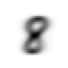

In [ ]:
show_image(mean8);

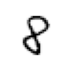

In [ ]:
v_3 = stacked_val3[1]
v_1 = stacked_val1[1]
v_8 = stacked_val8[1]
v_7 = stacked_val7[1]
show_image(v_8)

In [ ]:
v_3 = stacked_val3
v_1 = stacked_val1
v_8 = stacked_val8
v_7 = stacked_val7

In [ ]:
v_3.shape,v_7.shape

(torch.Size([1227, 28, 28]), torch.Size([1253, 28, 28]))

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(v_3, mean3)

tensor([0.1314, 0.1100, 0.1454,  ..., 0.1324, 0.1218, 0.1266])

In [ ]:
v_3_dist = mnist_distance(v_3, mean3)
v_3_dist, v_3_dist.shape

(tensor([0.1314, 0.1100, 0.1454,  ..., 0.1324, 0.1218, 0.1266]),
 torch.Size([1227]))

In [ ]:
v_7_dist = mnist_distance(v_7, mean7)
v_7_dist, v_7_dist.shape

(tensor([0.0949, 0.1043, 0.1146,  ..., 0.1146, 0.1244, 0.0941]),
 torch.Size([1253]))

In [ ]:
v_1_dist = mnist_distance(v_1, mean1)
v_1_dist, v_1_dist.shape

(tensor([0.0648, 0.0563, 0.0635,  ..., 0.0668, 0.0747, 0.0525]),
 torch.Size([1349]))

In [ ]:
v_8_dist = mnist_distance(v_8, mean8)
v_8_dist, v_8_dist.shape

(tensor([0.1563, 0.1161, 0.1362,  ..., 0.1117, 0.1157, 0.1400]),
 torch.Size([1171]))

In [ ]:
def is_1(x) : return  ((((mnist_distance(x,mean1) < mnist_distance(x,mean3))< mnist_distance(x,mean7)) < mnist_distance(x,mean8)))

In [ ]:
accuracy_1_1= is_1(v_1).float().mean()
accuracy_1_1

tensor(1.)

In [ ]:
accuracy_1_3= is_1(v_3).float().mean()
accuracy_1_3

tensor(0.3578)

In [ ]:
accuracy_1_8= is_1(v_8).float().mean()
accuracy_1_8

tensor(0.7942)

In [ ]:
accuracy_1_7= is_1(v_7).float().mean()
accuracy_1_7

tensor(0.9657)

In [ ]:
overall_1_accuracy = (accuracy_1_1 + accuracy_1_3 + accuracy_1_8 + accuracy_1_7) / 4
overall_1_accuracy

tensor(0.7794)

In [ ]:
def is_3(x) : return  ((((mnist_distance(x,mean3) < mnist_distance(x,mean1))< mnist_distance(x,mean7)) < mnist_distance(x,mean8)))

In [ ]:
accuracy_3_3= is_3(v_3).float().mean()
accuracy_3_3

tensor(0.6422)

In [ ]:
accuracy_3_7= is_3(v_7).float().mean()
accuracy_3_7

tensor(0.0343)

In [ ]:
accuracy_3_8= is_3(v_8).float().mean()
accuracy_3_8

tensor(0.2058)

In [ ]:
accuracy_3_1= is_3(v_1).float().mean()
accuracy_3_1

tensor(0.)

In [ ]:
overall_3_accuracy = (accuracy_3_1 + accuracy_3_3 + accuracy_3_8 + accuracy_3_7) / 4
overall_3_accuracy

tensor(0.2206)

In [ ]:
def is_7(x) : return  ((((mnist_distance(x,mean7) < mnist_distance(x,mean1))< mnist_distance(x,mean3)) < mnist_distance(x,mean8)))

In [ ]:
accuracy_7_7= is_7(v_7).float().mean()
accuracy_7_7

tensor(0.8204)

In [ ]:
accuracy_7_8= is_7(v_8).float().mean()
accuracy_7_8

tensor(0.1144)

In [ ]:
accuracy_7_3= is_7(v_3).float().mean()
accuracy_7_3

tensor(0.0693)

In [ ]:
accuracy_7_1= is_7(v_1).float().mean()
accuracy_7_1

tensor(0.0007)

In [ ]:
overall_7_accuracy = (accuracy_7_7 + accuracy_7_3 + accuracy_7_8 + accuracy_7_7) / 4
overall_7_accuracy

tensor(0.4561)

In [ ]:
def is_8(x) : return  ((((mnist_distance(x,mean8) < mnist_distance(x,mean1))< mnist_distance(x,mean3)) < mnist_distance(x,mean7)))

In [ ]:
accuracy_8_8= is_8(v_8).float().mean()
accuracy_8_8

tensor(0.4987)

In [ ]:
accuracy_8_1= is_8(v_1).float().mean()
accuracy_8_1

tensor(0.0007)

In [ ]:
accuracy_8_7= is_8(v_7).float().mean()
accuracy_8_7

tensor(0.0423)

In [ ]:
accuracy_8_3= is_8(v_3).float().mean()
accuracy_8_3

tensor(0.2551)

In [ ]:
overall_8_accuracy = (accuracy_8_1 + accuracy_8_3 + accuracy_8_8 + accuracy_8_7) / 4
overall_8_accuracy

tensor(0.1992)

In [ ]:
accuracy_TEST_1_1 = is_1(TEST_1).float().mean()
accuracy_TEST_1_1

tensor(0.9991)

In [ ]:
accuracy_TEST_1_3 = is_1(TEST_3).float().mean()
accuracy_TEST_1_3

tensor(0.3525)

In [ ]:
accuracy_TEST_1_7 = is_1(TEST_7).float().mean()
accuracy_TEST_1_7

tensor(0.9689)

In [ ]:
accuracy_TEST_1_8 = is_1(TEST_8).float().mean()
accuracy_TEST_1_8

tensor(0.7495)

In [ ]:
overall_test_1_accuracy = (accuracy_TEST_1_1+ accuracy_TEST_1_3 + accuracy_TEST_1_7+ accuracy_TEST_1_8) / 4
overall_test_1_accuracy

tensor(0.7675)

In [ ]:
accuracy_TEST_3_1 = is_3(TEST_1).float().mean()
accuracy_TEST_3_1

tensor(0.0009)

In [ ]:
accuracy_TEST_3_3 = is_3(TEST_3).float().mean()
accuracy_TEST_3_3

tensor(0.6475)

In [ ]:
accuracy_TEST_3_7 = is_3(TEST_7).float().mean()
accuracy_TEST_3_7

tensor(0.0311)

In [ ]:
accuracy_TEST_3_8 = is_3(TEST_8).float().mean()
accuracy_TEST_3_8

tensor(0.2505)

In [ ]:
overall_test_3_accuracy = (accuracy_TEST_3_1+ accuracy_TEST_3_3 + accuracy_TEST_3_7+ accuracy_TEST_3_8) / 4
overall_test_3_accuracy

tensor(0.2325)

In [ ]:
accuracy_TEST_7_8 = is_7(TEST_8).float().mean()
accuracy_TEST_7_8

tensor(0.1561)

In [ ]:
accuracy_TEST_7_7 = is_7(TEST_7).float().mean()
accuracy_TEST_7_7

tensor(0.7918)

In [ ]:
accuracy_TEST_7_1 = is_7(TEST_1).float().mean()
accuracy_TEST_7_1

tensor(0.)

In [ ]:
accuracy_TEST_7_3 = is_7(TEST_3).float().mean()
accuracy_TEST_7_3

tensor(0.0782)

In [ ]:
overall_test_7_accuracy = (accuracy_TEST_7_1+ accuracy_TEST_7_3 + accuracy_TEST_7_7+ accuracy_TEST_7_8) / 4
overall_test_7_accuracy

tensor(0.2565)

In [ ]:
accuracy_TEST_8_3 = is_8(TEST_3).float().mean()
accuracy_TEST_8_3

tensor(0.2406)

In [ ]:
accuracy_TEST_8_1 = is_8(TEST_1).float().mean()
accuracy_TEST_8_1

tensor(0.)

In [ ]:
accuracy_TEST_8_7 = is_8(TEST_7).float().mean()
accuracy_TEST_8_7

tensor(0.0409)

In [ ]:
accuracy_TEST_8_8 = is_8(TEST_8).float().mean()
accuracy_TEST_8_8

tensor(0.5544)

In [ ]:
overall_test_8_accuracy = (accuracy_TEST_8_1+ accuracy_TEST_8_3 + accuracy_TEST_8_7+ accuracy_TEST_8_8) / 4
overall_test_8_accuracy

tensor(0.2090)